<a href="https://colab.research.google.com/github/marawan1805/DataEngineering/blob/main/Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [275]:
df = pd.read_csv('Car_sale_ads.csv')

In [276]:
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


**Data Cleaning**

In [277]:
#when we used the df.isnull().sum() function we found that these following columns had too many missing values 
# and needed to be droped

df.drop('Vehicle_version' , axis = 1 , inplace = True)
df.drop('Vehicle_generation' , axis = 1 , inplace = True)
df.drop('CO2_emissions' , axis = 1  , inplace = True)
df.drop('Origin_country' , axis = 1 , inplace = True)
df.drop('First_owner' , axis = 1 , inplace = True)
df.drop('First_registration_date' , axis = 1 , inplace = True)

In [278]:
# here the columns with missing values have to be delt with by using imputations that are done below 
df.isnull().sum()

Index                         0
Price                         0
Currency                      0
Condition                     0
Vehicle_brand                 0
Vehicle_model                 0
Production_year               0
Mileage_km                  983
Power_HP                    643
Displacement_cm3           1966
Fuel_type                     0
Drive                     15076
Transmission                479
Type                          0
Doors_number               1487
Colour                        0
Offer_publication_date        0
Offer_location                0
Features                      0
dtype: int64

**Detecting and Removing Outliers**

<AxesSubplot:xlabel='Power_HP'>

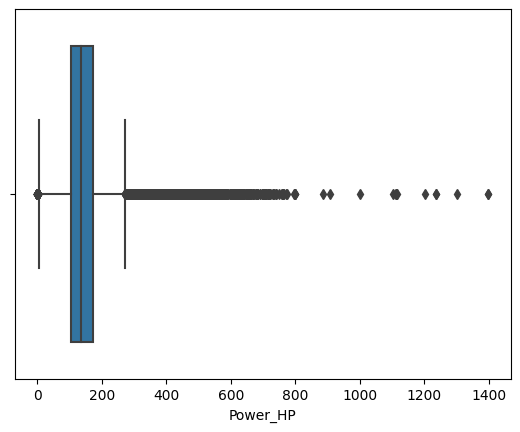

In [279]:
#box-plot before removing outliers
sns.boxplot(x=df['Power_HP'])

In [280]:
Q1 = df['Power_HP'].quantile(0.25)
Q3 = df['Power_HP'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

67.0


In [281]:
arr_1 = df['Power_HP'] < (Q1 - 1.5 * IQR)
arr_2 = df['Power_HP'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)

In [282]:
print("No. of outliers: ", mask.sum())


No. of outliers:  14090


In [283]:
#Removing the outliers
df = df[~(mask)]
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Front wheels,Manual,coupe,2.0,silver,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


<AxesSubplot:xlabel='Power_HP'>

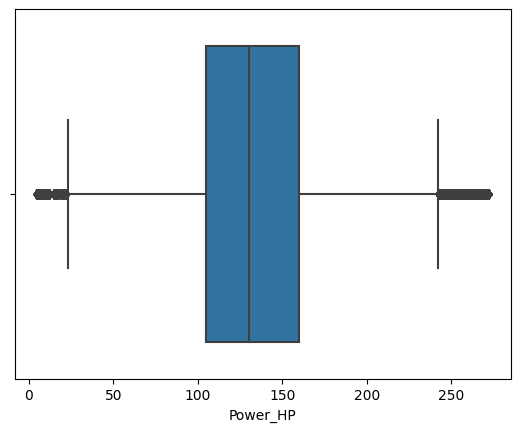

In [284]:
#box-plot after removing outliers
sns.boxplot(x=df['Power_HP'])

<AxesSubplot:xlabel='Displacement_cm3'>

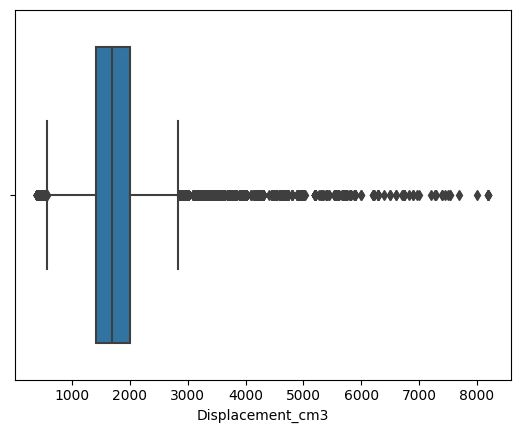

In [285]:
#box-plot before removing outliers
sns.boxplot(x=df['Displacement_cm3'])

In [286]:
Q1 = df['Displacement_cm3'].quantile(0.25)
Q3 = df['Displacement_cm3'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

573.0


In [287]:
arr_1 = df['Displacement_cm3'] < (Q1 - 1.5 * IQR)
arr_2 = df['Displacement_cm3'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)

In [288]:
print("No. of outliers: ", mask.sum())


No. of outliers:  9205


In [289]:
#Removing the outliers
df = df[~(mask)]
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Front wheels,Manual,coupe,2.0,silver,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


<AxesSubplot:xlabel='Displacement_cm3'>

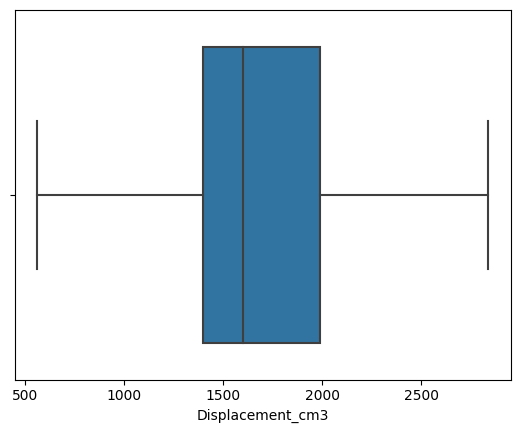

In [290]:
#box-plot after removing outliers
sns.boxplot(x=df['Displacement_cm3'])

In [291]:
# here we filled in the missing values using the mode as this is a categorcal variable

df['Transmission'] = df['Transmission'].fillna(df['Transmission'].mode()[0])

In [292]:
df.isnull().sum()


Index                         0
Price                         0
Currency                      0
Condition                     0
Vehicle_brand                 0
Vehicle_model                 0
Production_year               0
Mileage_km                  793
Power_HP                    609
Displacement_cm3           1652
Fuel_type                     0
Drive                     13389
Transmission                  0
Type                          0
Doors_number               1286
Colour                        0
Offer_publication_date        0
Offer_location                0
Features                      0
dtype: int64

In [293]:
#fill the missing values for numerical terms - mean(Continous Variables) - after removing outliers
df['Power_HP'] = df['Power_HP'].fillna(df['Power_HP'].mean())
df['Displacement_cm3'] = df['Displacement_cm3'].fillna(df['Displacement_cm3'].mean())
df['Doors_number'] = df['Doors_number'].fillna(df['Doors_number'].mean())

In [294]:
# Here we selected the not null rows and put them in the dataframe

df = df[df['Mileage_km'].notna()]
df = df[df['Drive'].notna()]

In [295]:
#Dropping unneeded columns
df.drop('Offer_publication_date' , axis = 1 , inplace = True)
df.drop('Offer_location' , axis = 1 , inplace = True)
df.isnull().sum()

Index               0
Price               0
Currency            0
Condition           0
Vehicle_brand       0
Vehicle_model       0
Production_year     0
Mileage_km          0
Power_HP            0
Displacement_cm3    0
Fuel_type           0
Drive               0
Transmission        0
Type                0
Doors_number        0
Colour              0
Features            0
dtype: int64

**Data Visulization**

We are using Plotly for our visualizations
https://plotly.com/python/

In [296]:
#pip install plotly
import plotly.graph_objects as go
import plotly.express as px
pd.options.mode.chained_assignment = None

<AxesSubplot:>

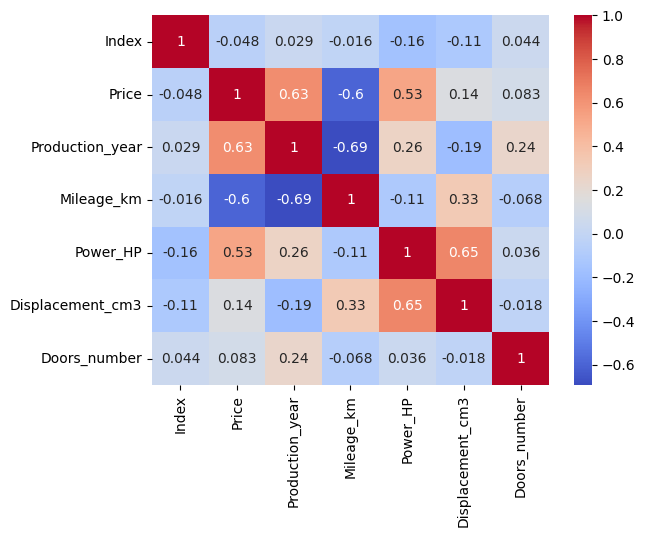

In [297]:
# Exploring the correlation between the diffrent variables and how they are affected by each other
corr = df.corr()
sns.heatmap(corr , annot = True , cmap = 'coolwarm')

In [298]:
# Creating a smaller dataset to show most common brands
dfr1 = df[['Vehicle_brand']]
dfr1 = dfr1.groupby(['Vehicle_brand']).mean().round(0).reset_index()
dfr1.insert(1,'Count',0)
dfr1.head()


,Vehicle_brand,Count
0,Abarth,0
1,Acura,0
2,Aixam,0
3,Alfa Romeo,0
4,Alpine,0


In [299]:
# populating count column with number of cars for every brand
def count(brand):
    return df.copy()['Vehicle_brand'].where(df['Vehicle_brand'] == brand).value_counts()

for row in dfr1.index:
    dfr1['Count'][row] = count(dfr1['Vehicle_brand'][row])

dfr1.head()

,Vehicle_brand,Count
0,Abarth,47
1,Acura,2
2,Aixam,5
3,Alfa Romeo,920
4,Alpine,2


In [353]:
# Visualizing the Most Common Car Brands
fig = px.pie(dfr1, values='Count', names='Vehicle_brand', title='Most Common Car Brands',
hover_data=['Count'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [301]:
# Creating a smaller dataset to compare Brand vs Price
dff1 = df[['Vehicle_brand', 'Price']]
dff1 = dff1.groupby(['Vehicle_brand']).mean().round(0).reset_index()
dff1 = dff1[dff1['Price'] <= 1000000] 
dff1.head()

,Vehicle_brand,Price
0,Abarth,63103.0
1,Acura,32850.0
2,Aixam,31940.0
3,Alfa Romeo,39059.0
4,Alpine,287155.0


In [302]:
# Visualizing Brand vs Price
dff1.set_index('Vehicle_brand')
dff1 = dff1.sort_values(by="Price",ascending=True)

px.bar(dff1,x='Vehicle_brand',y='Price',barmode='group',
labels={ "Vehicle_brand": "Brand"},
title='Average Prices of Different Brands in Used Cars Market',width=1600,height=600)

In [303]:
# Creating a smaller dataframe and grouping by year
df1 = df[['Production_year', 'Price']]
df1 = df1[df1['Price'] <= 1000000]
df1 = df1[df1['Production_year'] > 1930]
df1 = df1.groupby(['Production_year']).mean().round(0).reset_index()
df1.head()

,Production_year,Price
0,1936,79900.0
1,1948,52667.0
2,1952,12000.0
3,1953,62500.0
4,1954,120000.0


In [304]:
# Visualizing the average of car prices through different years, graph shows a decay in the prices of cars over the years since 1948 which was the peak of cars' prices.
fig = px.line(df1, x="Production_year", y="Price", title='Car Prices through the Years')
fig.update_xaxes(title_text = "Production Year")
fig.show()

In [305]:
# Creating a smaller dataframe and creating new columns for transmission count
df2 = df[['Production_year']]
df2 = df2[df2['Production_year'] > 1980]
df2 = df2.groupby(['Production_year']).mean().reset_index()
df2.insert(1,'Manual',0)
df2.insert(2,'Automatic',0)
df2.head()

,Production_year,Manual,Automatic
0,1981,0,0
1,1982,0,0
2,1983,0,0
3,1984,0,0
4,1985,0,0


In [306]:
# Counting number of cars by transmission each year
def manual(year):
    return df['Transmission'].where((df['Production_year'] == year)
    & (df['Transmission'] == 'Manual')).value_counts()

def automatic(year):
    return df['Transmission'].where((df['Production_year'] == year)
    & (df['Transmission'] == 'Automatic')).value_counts()

for row in df2.index:
    df2['Manual'][row] = manual(df2['Production_year'][row])
    df2['Automatic'][row] = automatic(df2['Production_year'][row])
    
df2.head()

,Production_year,Manual,Automatic
0,1981,13,4
1,1982,18,3
2,1983,21,5
3,1984,11,6
4,1985,20,9


In [307]:
# Visualizing Transmission over the Years
fig = px.line(df2, x="Production_year", y=['Manual', 'Automatic'], 
labels={ "Production_year": "Production Year"},
title="Transmission over the Years")
fig.update_yaxes(title_text = "Number of Cars")
fig.show()

In [308]:
# Creating a smaller dataframe and grouping by colour
df3 = df[['Colour', 'Price']]
df3 = df3.groupby(['Colour']).mean().round(0).reset_index()

In [309]:
# Detecting if a color can cause an impact on the price of a car

fig = go.Figure(data=[go.Scatter(
    x=df3['Colour'], y=df3['Price'],
    mode='markers',
    marker=dict(
        color=['beige', 'black',
               'blue', 'brown', 'purple', 'gold', 
               'grey', 'green', 'turquoise', 'red', 'silver',
               'violet', 'white', 'yellow'],
        size=[30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30]
    ),
)])
fig.update_yaxes(title_text = "Price")
fig.update_xaxes(title_text = "Color")

fig.update_layout(
    title="Which Car Color is Most Expensive", 
)
fig.show()


In [310]:
# Creating a smaller dataframe and grouping by year
dff2 = df[['Displacement_cm3', 'Power_HP', 'Production_year']]
dff2 = dff2.groupby(['Production_year']).mean().round(0).reset_index()
dff2.head()

,Production_year,Displacement_cm3,Power_HP
0,1927,1525.0,29.0
1,1930,2500.0,75.0
2,1936,1288.0,26.0
3,1948,2030.0,58.0
4,1952,2400.0,70.0


In [311]:
# Visualizing How Displacement & HP change over the Years
fig = px.scatter_3d(dff2, x='Displacement_cm3', z='Production_year', y='Power_HP', 
color = 'Production_year', 
labels={ "Displacement_cm3": "Displacement", "Production_year": "Production Year", 
"Power_HP": "Power"},
title='How Displacement & HP change over the Years',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

In [331]:
# Creating a smaller dataframe and grouping by Type
df4 = df[['Type','Displacement_cm3', 'Price']]
df4 = df4.groupby(['Type']).mean().round(0).reset_index()
df4.columns = ['Type', 'Displacement_cm3', 'Average Price']
numberTypes=df['Type'].value_counts()
df4.head()

,Type,Displacement_cm3,Average Price
0,SUV,1759.0,91047.0
1,city_cars,1335.0,26772.0
2,compact,1570.0,39468.0
3,convertible,1846.0,41644.0
4,coupe,1919.0,65954.0


In [346]:
# Trying to investigate Which Car Type has Highest Price, Count & Displacement
fig = px.scatter(df4, x="Type", y="Displacement_cm3",
	         size=numberTypes, color="Average Price", 
			 title='Which Car Type has Highest Price, Count & Displacement',
			 labels={ "Displacement_cm3": "Avg Displacement", "size": "Count"}
			)
fig.show()